# Exploring Twitter data
In this notebook, we are going to explore our cleaned dataset that we have created in the first notebook.

We are going to do some exploratory analysis in order to understand the shape of the data, patterns and values, correlations between features, and hidden meaning behind our data.

## Goal: 
Learn some common aspects of data exploration, calculate some statistics and visualize data column by column.

## Introduction to exploratory data analysis
[Exploratory data analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. (Wikipedia)


### Data exploration process:
 - Computing summary statistics
 - Plotting
 - Additional wrangling if needed.

## Load python modules

Load python libraries first. Additional libraries that we are going to use in this notebook are: 
 - [wordcloud](https://amueller.github.io/word_cloud/) -  used to create wordclouds in Python
 - [nltk](https://www.nltk.org/) - natural language toolkit, library to work with language.
 - [folium](https://python-visualization.github.io/folium/) - library for creating maps.

In [1]:
try:
    import urllib.request
except ImportError:
    !pip install  --user  urllib
    import urllib.request
    
try:
    import pandas as pd
except ImportError:
    !pip install  --user  pandas
    import pandas as pd
    
try:
    from wordcloud import WordCloud
except ImportError:
    !pip install  --user wordcloud
    from wordcloud import WordCloud
    
try:
    import matplotlib
    import matplotlib.pyplot as plt
except ImportError:
    !pip install  --user matplotlib
    import matplotlib
    import matplotlib.pyplot as plt

%matplotlib inline

try:
    import nltk
except ImportError:
    !pip install  --user nltk
    import nltk

try:
    import folium
    from folium.plugins import MarkerCluster
except ImportError:
    !pip install  --user folium
    import folium
    from folium.plugins import MarkerCluster

#### First, we will download the cleaned dataset from object store and display the first 5 rows

There is a copy of the cleaned dataset we just created saved to object store. You can download it or use your local copy, created in the first notebook.
We will read the csv file into pandas dataframe and printing first 5 rows.

In [2]:
target_url="https://swift-yeg.cloud.cybera.ca:8080/v1/AUTH_233e84cd313945c992b4b585f7b9125d/geeky-summit/alberta_tweets_cleaned.csv"
file_name="alberta_tweets_cleaned.csv"

 ## comment out this line to use your local copy 
urllib.request.urlretrieve(target_url, file_name)
## reading 'created_at_date' column as timestamp

tweets = pd.read_csv(file_name,parse_dates=['created_at_date']) 

#timezone needs to be converted again
tweets.created_at_date= tweets.created_at_date.dt.tz_localize('UTC').dt.tz_convert('MST') 
tweets.head()

,created_at_date,hashtags_string,user_string,user_location,longitude,latitude,name,screen_name,extended_tweet,extended_tweet_cleaned
0,2018-12-18 10:23:54-07:00,xmas nicelist,CallawayGolfEU,NaN,NaN,NaN,jeff ullock,JeffUllock,@CallawayGolfEU The crows nest hands down! #xm...,The crows nest hands down!
1,2018-12-18 10:24:19-07:00,highschooldesign,,"Kitscoty, Alberta",NaN,NaN,Jackie Bouck,JackieBouck,Does anyone know of any high schools that have...,Does anyone know of any high schools that have...
2,2018-12-18 10:24:30-07:00,,miss9afi,"Alberta, Canada",NaN,NaN,Faiz Ali Qureshi 🇨🇦,FKamranAB,@miss9afi That's blasphemy law you can say it...,That's blasphemy law you can say it's like ...
3,2018-12-18 10:24:44-07:00,,ABLiberal,"Calgary, Alberta",NaN,NaN,Irwin Singh Brar,roti888,Albertans voted for @ABLiberal in 1993-2012 th...,Albertans voted for in 1993-2012 they were o...
4,2018-12-18 10:24:48-07:00,,,"Calgary, Alberta",NaN,NaN,Vince,VincentRule,Dear god you people are dumb! Their members ar...,Dear god you people are dumb! Their members ar...


## Data Exploration

#### We will explore the data column by column 
A couple of things to keep in mind while doing this is what are we expecting from the data? Are our observations consistent with these expectations? If not, why do they not line up? Are there any trends, outliers, or interesting observations to make note of? 

### `extended_tweet_cleaned` column

Let's begin with this column as this is likely the most interesting one to us. It contains all the text data tweeted out in each tweet. We would like to analyze this further. One way to examine the tweets is by looking at word frequencies. This could be done by using a bar chart or alternatively, using a word cloud. 

As you might imagine, if  we just go ahead and create a word cloud, it will be dominated by some very commonly used words, such as "the", "or", "and", etc. In order to prevent these common words from dominating the plot, we will remove them. Commonly used words that don't add anything contextually interesting such as this are called "stopwords". The wordcloud package that we will be using has a pre-built list of stopwords. 

Let's import them and examine:

In [3]:
from wordcloud import  STOPWORDS
print(STOPWORDS)

{'over', 'or', "won't", 'however', "mustn't", 'am', "wasn't", "doesn't", 'theirs', 'up', 'some', 'in', 'to', "he'd", 'because', 'the', 'few', 'herself', "how's", "we've", 'has', 'and', 'other', 'while', 'myself', 'also', 'again', 'had', 'our', 'against', 'himself', 'this', 'until', "that's", 'those', 'cannot', 'their', "we'd", 'at', "isn't", 'is', 'there', 'were', 'only', "aren't", 'ourselves', 'which', "they're", 'are', "i'll", 'after', "didn't", 'themselves', 'such', 'they', 'your', 'above', 'down', 'that', 'k', 'could', "we'll", "weren't", "wouldn't", 'off', 'nor', 'yourselves', "he'll", 'him', "they've", "where's", 'no', 'them', 'doing', 'so', 'by', "you'll", 'where', 'hers', 'than', "here's", 'as', 'how', 'same', 'during', 'being', 'did', "what's", "there's", 'me', 'his', 'about', 'be', "hadn't", 'each', 'then', "let's", 'she', 'between', "they'd", 'it', 'would', 'further', "i've", 'more', 'whom', 'too', "who's", 'but', 'you', 'not', "they'll", 'we', "don't", 'ever', 'below', 'com

Now we'll use the [WordCloud()](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud) function from the wordcloud library.

In [16]:
stopwords = set(STOPWORDS)
#In the following function, random_state is set for reproducibility and collocation=False means 
#that if the same word is encountered in collocation with different words,
#it is still considered as one word (to remove duplicates)
def wordcloud(tweets,col):
    wordcloud = WordCloud(collocations=False,background_color="white",stopwords=stopwords,random_state = 2018).generate(" ".join([i for i in tweets[col]]))
    plt.figure( figsize=(10,5))
    plt.imshow(wordcloud)
    plt.axis("off") 

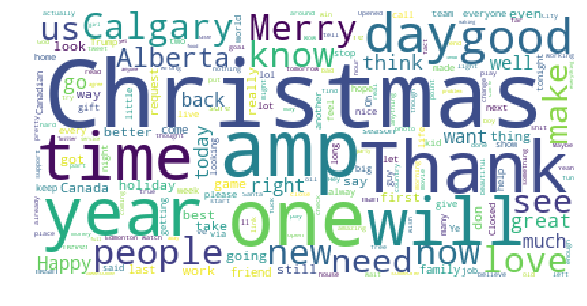

In [17]:
wordcloud(tweets,'extended_tweet_cleaned')


All these words make a lot of sense, except for... amp?? Let's find some sample tweets that will allows us to inspect them why people might be tweeting about amps. 

In [18]:
pd.set_option('max_colwidth', 700)
tweets[tweets['extended_tweet_cleaned'].str.contains("amp")]['extended_tweet_cleaned'].head(10)

45                      Whose we &amp; why , who benefits ? Great time for working people to take advantage of supply/demand and address the extreme tax imbalance or get revenue directly from employers. The economy is to serve the people . Plus time to demand value for services and more benefits not less 
49                                                                                                                                                                                                                                  Today we are hitting the streets in downtown   with our   to share   &amp;    
73                                                                                                                                                                          Having some fun on the tour w/ Minister   &amp;  , talking about the thoughtful design features of the new purpose build The Maple.   
74                                                                             

It appears that &amp is just a shortcut for ampersand. This is a bit misleading and so let's delete all the &amp occurences from the 'extended_tweet_cleaned' column. 

What would be another way of dealing with the confusing &amp text? 

In [19]:
tweets['extended_tweet_cleaned']=tweets['extended_tweet_cleaned'].str.replace('&amp',' ')

#### Exclude "one" and "will" words
"one" and "will" words can be possibly excluded as well, they don't have any special meaning. In this case, we'll add them to the list of stop words.

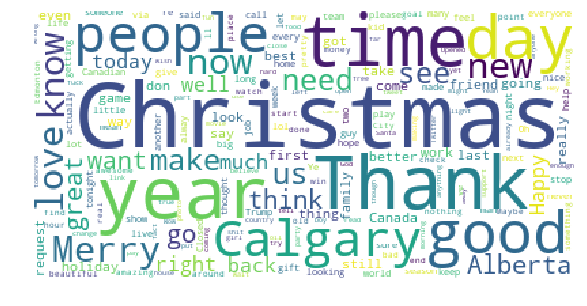

In [21]:
stopwords.add("one")
stopwords.add("will")
wordcloud(tweets,'extended_tweet_cleaned')

#### Exercise: add Calgary and AB (or other words as you like) to stowords to exclude them from wordcloud and try plotting the wordcloud again.

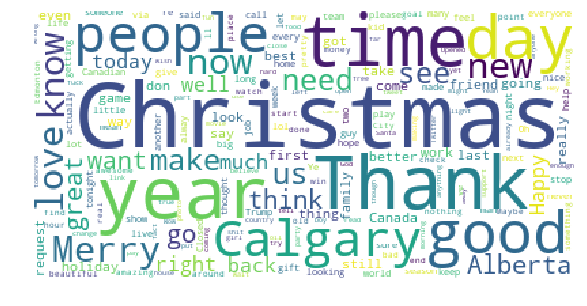

In [22]:
### type something here
wordcloud(tweets,'extended_tweet_cleaned')

OK - this word cloud looks more sensible. What picture emerges from this? Are there any  themes we can identify? People seem to be discussing Christmas, year, and something about time - maybe mentioning a good time? While we can guess at some of these aspects, it's impossible to say anything about the context these words occur in. For that, we would need some more sophisticated analyses. This could include aspects like n-gram analysis or topic modelling, which is what we will take a look at in the next notebook. 

### `Created_at_date` column
This column is of type Timestamp. 
The following [features](https://www.geeksforgeeks.org/python-working-with-date-and-time-using-pandas/) can be useful for working with the Timestamp format:
 - **dt.year** returns the year of the date time.
 - **dt.month** returns the month of the date time.
 - **dt.day** returns the day of the date time.
 - **dt.hour** returns the hour of the date time.
 - **dt.minute** returns the minute of the date time.
   
 Min/max functions can be used with timestamp as well.   
   
 Let's find out the time range first:

In [4]:
print("Time range: ",min(tweets["created_at_date"]),"-",max(tweets["created_at_date"]))

Time range:  2018-12-18 10:23:54-07:00 - 2018-12-27 16:36:37-07:00


We have data from December 18 to December 17
#### Let's group by day and calculate the number of tweets for each day.

We will use the [groupby](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html), which is a pandas function that groups rows into groups based on one or multiple columns.

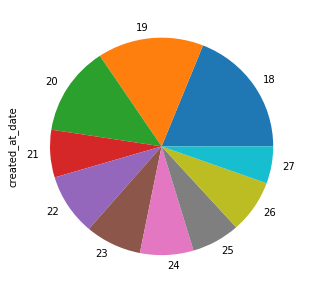

In [5]:
plt.figure(figsize=(5,5))
tweets["created_at_date"].groupby(tweets["created_at_date"].dt.day).count().plot(kind="pie")

This pie chart shows the proportion of tweets per day. The number on the circle corresponds to one of the days the data was collected. 

Another way to plot this is as a bar chart: 

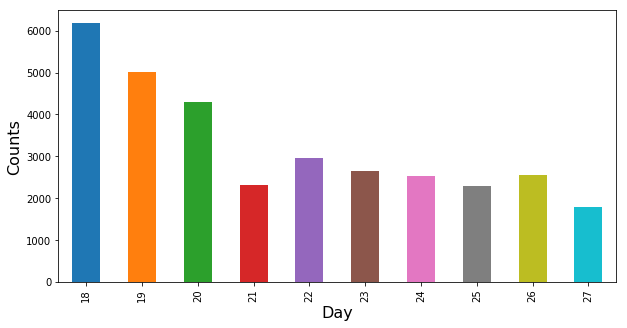

In [12]:
ax = tweets["created_at_date"].groupby([tweets["created_at_date"].dt.day]).count().plot(kind="bar", figsize=(10,5))
ax.set_xlabel("Day", size =16)
ax.set_ylabel("Counts", size=16)
plt.show()

It looks like the most tweets took place on December 18th. Let's confirm that and check out some additional summary stats. 

In [14]:
print("Total number of tweets: ",
      tweets.shape[0])

print("Number of tweets collected on December 18: ", 
      tweets.loc[tweets["created_at_date"].dt.day==18].shape[0])


Total number of tweets:  32598
Number of tweets collected on December 18:  6178


#### Let's take a look at the number of tweets by hour of day and whether this make sense with what we expect. What kind of pattern would you expect? 
 
#### Exercise: Using the same methodology as for the bar chart above, can you plot the number of tweets by hour? 

In [ ]:
## type something here

In [27]:
print("Total number of tweets collected between 23:00 and 00:00: ", 
      tweets["created_at_date"].groupby([tweets["created_at_date"].dt.hour]).count()[23])

print("Total number of tweets collected between 09:00 and 10:00: ", 
      tweets["created_at_date"].groupby([tweets["created_at_date"].dt.hour]).count()[9])


Total number of tweets collected between 23:00 and 00:00:  900
Total number of tweets collected between 09:00 and 10:00:  1385


#### Exercise: plot tweets number by day and hour 
Hint: for two conditions in groupby() function use list format []
>instead of groupby(value) use groupby([value1,value2])

In [ ]:
plt.figure( figsize=(15,10))
## type something here

OK - so far everything looks as we expected it for when the tweets were collected and at which time of day users were  most active. Let's move on to the next column. 

### `Hashtag_string`  and `user_string` columns
These two columns are of type String and have a list of hastags/user mentions separated by a blank.  
We will create a list of all the hashtags first using the [join()](https://www.tutorialspoint.com/python/string_join.htm) and [split()](https://www.w3schools.com/python/ref_string_split.asp) functions. 

In [19]:
all_hashtags=" ".join([i for i in tweets['hashtags_string']]).split()
print(all_hashtags)

['xmas', 'nicelist', 'highschooldesign', 'AbLeg', 'abpoli', 'momlife', 'eia', 'tuesday', 'sandiego', 'apresski', 'rosslandbeerco', 'skiing', 'CALGARY', 'FeelGoodCrew', 'positivity', 'GoodVibes', '5DaysofChristmas', 'notenough', 'needmorecookies', 'cookiemonster', 'nomnom', 'delish', 'worksnacks', 'videoeditor', 'Flames1stGoal', 'yegheritage', 'yegjob', 'homemade', 'yycevents', 'weddings', 'makeupartist', 'shopping', 'clothing', 'Apparel', 'fashion', 'rings', 'swimsuit', 'Flames1stGoal', 'welovetogive', 'Memorialcomp', 'PopeCock', 'Flames1stGoal', 'A11yTalks', 'ckeditor', 'Drupal', 'motorcycle', 'atv', 'tgif', 'yegpodcast', 'edmonton', 'blamecanada', 'podcast', 'yvr', 'yul', 'yyc', 'la', 'mtl', 'ymm', 'listen', 'kimsconvenience', 'season3', 'Flames', 'DragonEnergy', 'Primal', 'Keto', 'Carnivore', 'Paleo', 'MeatHeals', 'FatFueled', 'LowCarb', 'Foodie', 'yycplants', 'GIF', 'yyc', 'yeg', 'cdnpoli', 'Flames1stGoal', 'CGYvsDAL', 'JerryForbesCentre', 'platechamps', 'IMATAGU', 'bestoftheworst'

Then we use the [FreqDist()](https://kite.com/python/docs/nltk.probability.FreqDist) function from nltk library to get frequence distribution for all the words.  That is, this function will count how many times each hashtag occurs. 

In [20]:
freque_dist=nltk.FreqDist(all_hashtags)
print("Most common hashtags: ",freque_dist.most_common(20)) ## most_common(n) function prints top n words with highest frequencies

Most common hashtags:  [('cdnpoli', 362), ('yyc', 228), ('Christmas', 106), ('yeg', 95), ('Flames', 91), ('calgary', 82), ('christmas', 73), ('abpoli', 65), ('merrychristmas', 63), ('Calgary', 60), ('Habs', 53), ('HomeAlone', 53), ('MerryChristmas', 50), ('Flames1stGoal', 48), ('HappyNewYear', 48), ('LetsGoOilers', 48), ('YYC', 43), ('yycnow', 39), ('uspoli', 39), ('ableg', 36)]


We can also visualize this using matplotlib to print the top 25 most common hashtags. It's possible to use the [plot()](https://kite.com/python/docs/nltk.probability.FreqDist.plot) function directly with a  FreqDist object.

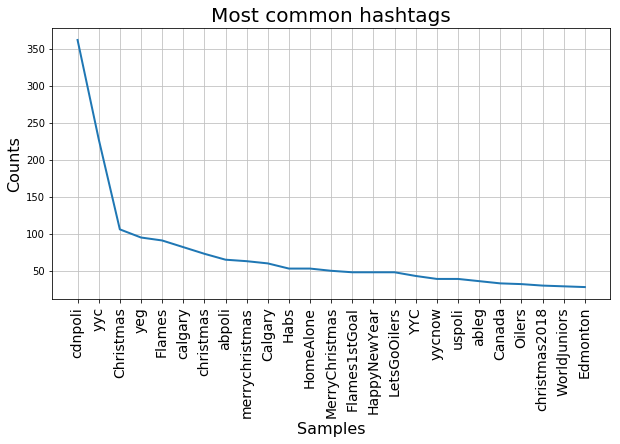

In [28]:
plt.figure(figsize=(10,5)) # plot size
plt.title("Most common hashtags", size = 20)
plt.xlabel("Hashtag", size = 16)
plt.ylabel("Counts", size = 16)
plt.xticks(fontsize=14) ## Change font for x axis labels
freque_dist.plot(25)


#### Most frequent user mentions
We will do the same steps for the user_string column:

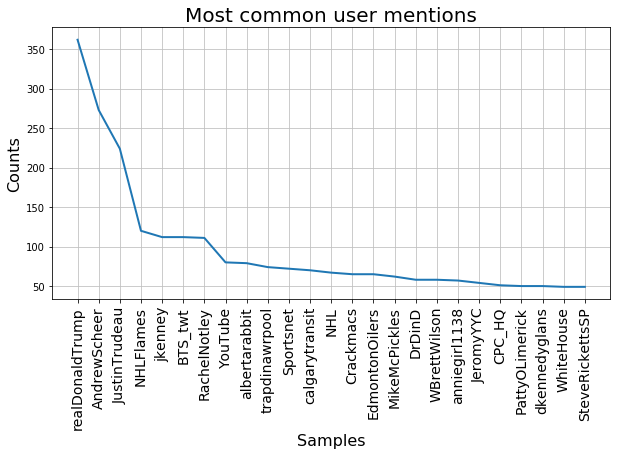

In [29]:
all_users=" ".join([i for i in tweets['user_string']]).split()
plt.figure(figsize=(10,5))
plt.title("Most common user mentions", size=20)
plt.xlabel("Tagged User", size=16)
plt.ylabel("Number of tags", size =16)
plt.xticks(fontsize=14)
fd = nltk.FreqDist(all_users)
fd.plot(25)

Surprisingly, or maybe not so surprisingly, this person is frequently discussed on Twitter, even in Calgary. However, while this users is mentioned a lot, are a lot of users actually mentioning him? We can find out by searching for all tweets mentioning him and then determining how many unique users actually mentioned him. 

#### How many users talked about the most commonly mentioned user? 
We will use [str.contains()](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.str.contains.html) function to get rows containing specific string:
> tweets['user_string'].str.contains("realDonaldTrump")

In [31]:
print("Number of tweets with the most common user mention 'realDonaldTrump':",
      len(tweets[tweets['user_string'].str.contains("realDonaldTrump")]['name']))

print("Number of users using the most common user mention 'realDonaldTrump':",
      len(tweets[tweets['user_string'].str.contains("realDonaldTrump")]['name'].unique()))

Number of tweets with the most common user mention 'realDonaldTrump': 361
Number of users using the most common user mention 'realDonaldTrump': 115


By contrast, how does this compare to the second most commonly mentioned user? Check the bar chart above and find out how many users mentioned it. 


In [33]:
print("Number of tweets with the most common user mention 'AndrewScheer':",
      len(tweets[tweets['user_string'].str.contains("AndrewScheer")]['name']))

print("Number of users using the most common user mention 'AndrewScheer':",
      len(tweets[tweets['user_string'].str.contains("AndrewScheer")]['name'].unique()))

Number of tweets with the most common user mention 'AndrewScheer': 272
Number of users using the most common user mention 'AndrewScheer': 59


So while the second user is mentioned less, there are in fact more people talking about them. 

#### Which users used the most number of user mentions?

In [34]:
print("Maximum number of user mentions:",
      max(tweets['user_string'].str.split().str.len()),
      "made by  ",
      tweets.loc[tweets['user_string'].str.split().str.len() == tweets['user_string'].str.split().str.len().max(), 'name'].unique())

Maximum number of user mentions: 11 made by   ['Kitsune likes you for who you are :)']


#### Exercise - try subsetting  data by hour ( for example between 9 and 10 am) and plot most common hashtags or user_mentions

In [ ]:
### type something here


### `User_location` column

In [35]:
print("Number of unique user locations:", len(tweets["user_location"].unique()), "\n")
print(tweets["user_location"].unique())

Number of unique user locations: 1701 

[nan 'Kitscoty, Alberta' 'Alberta, Canada' ... 'Rycroft, Alberta'
 '#Alberta #Canada' 'khartoum, Sudan']


There are 755 unique user_locations. These are locations that are entered by users in the profile and open to pretty much any input, which is why we see some odd locations in there. Not sure if this is overly interesting right now. Let's look into latitude/longitude instead.

### `Latitude/longitude` columns
We will subset data by day (to make it faster) and plot tweets that have coordinates on a map.

How are latitude/longitude added to a tweet? Do all tweets have them? How reliable is this data source? A few things to keep in mind as we go through this...

In [37]:
print("Total number of tweets: ",tweets.shape[0])
tweets_have_location=tweets[tweets["longitude"].notnull()]
print("Number of tweets having location data: ",tweets_have_location.shape[0])

tweets_subset_dec18=tweets_have_location.loc[tweets_have_location["created_at_date"].dt.day==18]
print("Number of tweets having location data for Nov 5: ",tweets_subset_dec18.shape[0])

Total number of tweets:  32598
Number of tweets having location data:  3378
Number of tweets having location data for Nov 5:  591


We can plot the location data on a map and use the library [folium](https://github.com/python-visualization/folium). We will iterate through each row in the November 5 subset of data and add the coordinates to the map where they exist. 

This can be accomplished using the [iterrrows()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iterrows.html) function to iterate through dataframe rows:

In [39]:
calgary_coords = [51.0486, -114.0708]
my_map = folium.Map(location = calgary_coords, zoom_start = 13)

for index,row in tweets_subset_dec18.iterrows():  
        folium.Marker([row["longitude"], row["latitude"]]).add_to(my_map) 
my_map

It looks like these locations are in line with what we expected. The highest distribution falls within the downtown core and if you scroll out, you'll notice that the scraper seems to have done a good job limiting the collected tweets to the Calgary region.

#### Exercise: try subsetting by user mention (e.g "calgarylibrary") and  plot tweets on a map
>Hint: use str.contains() function applied to tweets['user_string'] colum:
>tweets_have_location.loc[tweets['user_string'].str.contains("your_search_word")]

In [ ]:
### type something here


### `Screen_name` column

Let's look at some summary stats.

In [38]:
print("Total number of tweets: ",tweets.shape[0])
print("Total number of users: ",tweets['screen_name'].unique().shape[0])
print("Top 20 most active users:")
tweets["screen_name"].groupby(tweets["screen_name"]).count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)#.plot(kind="bar")

Total number of tweets:  32598
Total number of users:  6128
Top 20 most active users:


,screen_name,count
2211,PaulBruce_Ouch,627
2893,TommyChong840,583
25,311calgary,498
4019,ericcbarnes,369
1261,IanIdeaman7,327
945,Ember_Daily,313
5005,montrealdesign,307
1307,JC_in_Calgary,300
3171,_Tosin,295
1240,HungryTrucker,255


### Save data to csv
We have done a whole lot of exploring and some additonal data wrangling that has changed the data, so let's save an updated dataset to csv.

In [ ]:
tweets.to_csv('tweets_cleaned1.csv',index=False)

##  Conclusion

We've done some data exploration in order to try to understand the data better. Our time spent on each column depended on how complex the data is each column. Since we will continue to work with the text data, that is where we started and spent most of our time working with. 

Take-aways: 
* Data exploration helps provide a sense of the data that is there and often reveals interesting trends and patterns 
* Always consider both exploring the data using summary statistics along with data visualizations
* Think about what you would expect the data to look like going into it and determine whether your assumptions hold up. If not, why not? This could tell you important things about your data. 
* Subject matter expertise is invaluable in data science, including in the exploration phase. A solid understanding of how Twitter is used, or working with someone who does, can often quickly resolve questions that could otherwise take hours to answer. 

Next, we will go deeper into natural language processing, will  build topic models  and do sentiment analysis